Srushti R Patil

 21102B0066

 BE- CMPN -B

Accuracy: 0.9708
Precision: 0.9833
Recall: 0.9365
F1-Score: 0.9593


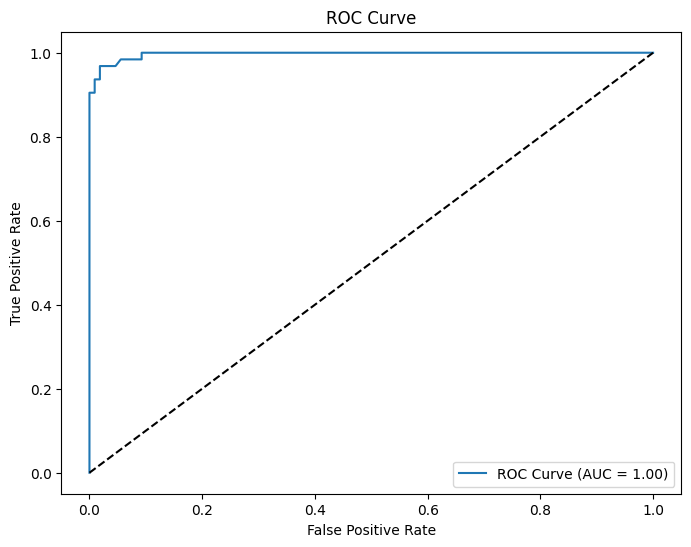

In [4]:
# Install necessary libraries (if not already installed)
!pip install -q scikit-learn matplotlib seaborn

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/wdbc.data"  # Ensure this matches the uploaded path
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data_classification = pd.read_csv(file_path, header=None, names=columns)

# Map the diagnosis to binary values: Malignant = 1, Benign = 0
data_classification['Diagnosis'] = data_classification['Diagnosis'].map({'M': 1, 'B': 0})

# Split the dataset into features and target variable
X_classification = data_classification.drop(['ID', 'Diagnosis'], axis=1)
y_classification = data_classification['Diagnosis']

# Split the data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)

# Make predictions on the test set
y_pred_clf = rf_clf.predict(X_test_clf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Calculate ROC AUC
y_pred_prob = rf_clf.predict_proba(X_test_clf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_clf, y_pred_prob)
roc_auc = roc_auc_score(y_test_clf, y_pred_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
